In [1]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

In [5]:
data_path = '/home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/'
fig_path = '../figures/'

# Years to load
start = 2014
end = 2016
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Vcs', 'Vcp', 'Vcm']
# Fill a dict with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file( data_path + 'US-' + x + '_daily_aflx.csv', yrtrim=[start, end])
         for x in sites }
d = pd.Panel(daily)


Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/US-Vcs_daily_aflx.csv
Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/US-Vcp_daily_aflx.csv
Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/FLUXNET2015_a/US-Vcm_daily_aflx.csv


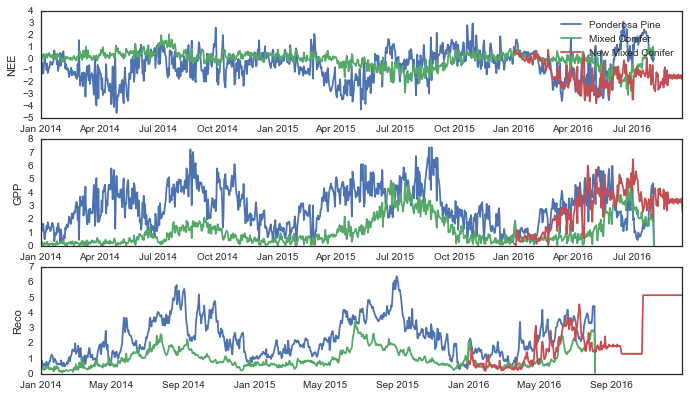

In [6]:
fig1 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Vcp.index, d.Vcp.FC_F_g_int)
ax.plot(d.Vcm.index, d.Vcm.FC_F_g_int)
ax.plot(d.Vcs.index, d.Vcs.FC_F_g_int)
ax.set_ylabel('NEE')
plt.legend(['Ponderosa Pine', 'Mixed Conifer', 'New Mixed Conifer'])
ax = plt.subplot(3, 1, 2)
ax.plot(d.Vcp.index, d.Vcp.GPP_g_int)
ax.plot(d.Vcm.index, d.Vcm.GPP_g_int)
ax.plot(d.Vcs.index, d.Vcs.GPP_g_int)
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Vcp.index, d.Vcp.RECO_g_int)
ax.plot(d.Vcm.index, d.Vcm.RECO_g_int)
ax.plot(d.Vcs.index, d.Vcs.RECO_g_int)
ax.set_ylabel('Reco')

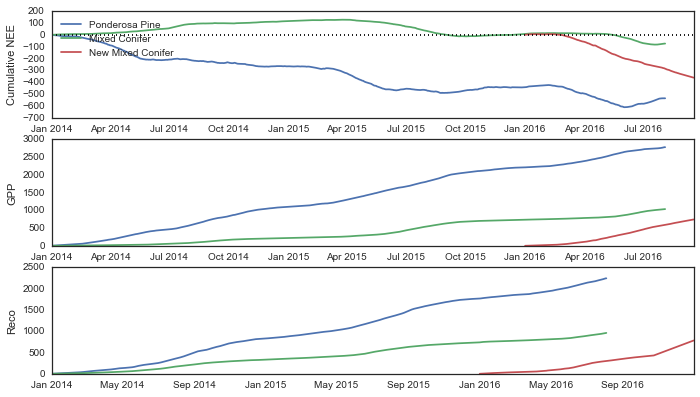

In [7]:
fig2 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Vcp.index, np.cumsum(d.Vcp.FC_F_g_int))
ax.plot(d.Vcm.index, np.cumsum(d.Vcm.FC_F_g_int))
ax.plot(d.Vcs.index, np.cumsum(d.Vcs.FC_F_g_int))
ax.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax.set_ylabel('Cumulative NEE')
plt.legend(['Ponderosa Pine', 'Mixed Conifer', 'New Mixed Conifer'], loc='upper left')
ax = plt.subplot(3, 1, 2)
ax.plot(d.Vcp.index, np.cumsum(d.Vcp.GPP_g_int))
ax.plot(d.Vcm.index, np.cumsum(d.Vcm.GPP_g_int))
ax.plot(d.Vcs.index, np.cumsum(d.Vcs.GPP_g_int))
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Vcp.index, np.cumsum(d.Vcp.RECO_g_int))
ax.plot(d.Vcm.index, np.cumsum(d.Vcm.RECO_g_int))
ax.plot(d.Vcs.index, np.cumsum(d.Vcs.RECO_g_int))
ax.set_ylabel('Reco')

fig2.savefig( fig_path + 'VC_sites_cum.svg')